<a href="https://colab.research.google.com/github/M-luthra07/RNN/blob/main/Practical_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [2]:

# Load and prepare the data
df = pd.read_csv("/content/Oregon_Vehicle_Miles_Traveled_by_county_2019_to_1991.csv")
county_data = df[df['County'] == 'BAKER'].sort_values(by='Year')
miles = county_data['Vehicle_Miles'].values.reshape(-1, 1)

In [3]:
# Normalize the data
scaler = MinMaxScaler()
scaled_miles = scaler.fit_transform(miles)


In [5]:
# Create sequences (10 years to predict next year)
X, y = [], []
seq_length = 10
for i in range(seq_length, len(scaled_miles)):
    X.append(scaled_miles[i-seq_length:i])
    y.append(scaled_miles[i])
X, y = np.array(X), np.array(y)
# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [6]:
# Build RNN model
model = Sequential()
model.add(SimpleRNN(64, activation='tanh', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=2, validation_data=(X_test, y_test))


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.1053 - val_loss: 0.1374
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0147 - val_loss: 0.2537
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0137 - val_loss: 0.1291
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0123 - val_loss: 0.1942
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0072 - val_loss: 0.1221
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0118 - val_loss: 0.2364
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0097 - val_loss: 0.1165
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0076 - val_loss: 0.2523
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0123 - val_loss: 0.1105
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0052 - val_loss: 0.2420
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0199 - val_loss: 0.1357
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0087 - val_lo

In [8]:

# Predict
y_pred = model.predict(X_test)
print(y_pred)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
[[0.54661274]
 [0.62455493]
 [0.7080664 ]
 [0.6772193 ]]


In [9]:
# Reverse scaling
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)
print(y_pred_actual)
print(y_test_actual)

[[2.6224350e+08]
 [2.7067683e+08]
 [2.7971280e+08]
 [2.7637510e+08]]
[[2.959e+08]
 [2.970e+08]
 [3.094e+08]
 [3.113e+08]]


In [10]:
# Metrics
mse = mean_squared_error(y_test_actual, y_pred_actual)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

MSE: 981686775251264.00
MAE: 31147940.00
R^2 Score: -19.07


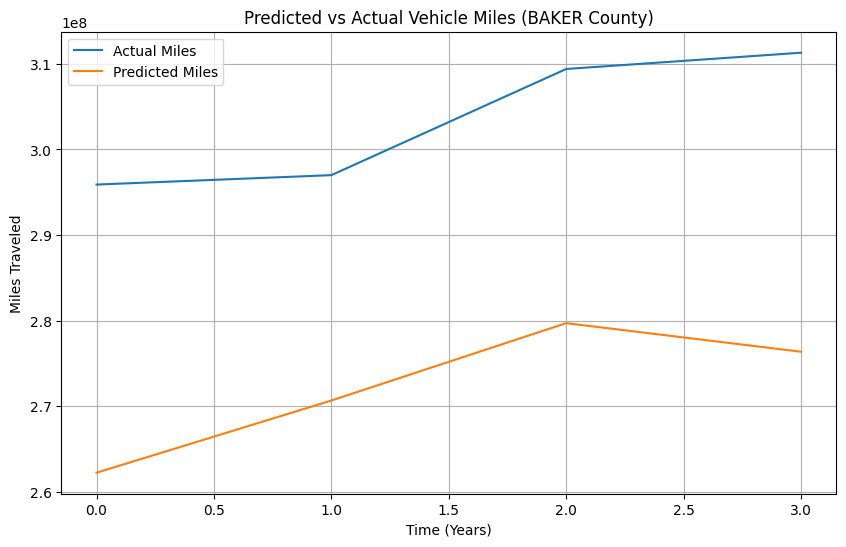

In [11]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Miles')
plt.plot(y_pred_actual, label='Predicted Miles')
plt.title('Predicted vs Actual Vehicle Miles (BAKER County)')
plt.xlabel('Time (Years)')
plt.ylabel('Miles Traveled')
plt.legend()
plt.grid(True)
plt.show()
